In [1]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.8 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/lib/python3.12/pathlib.py", line 441, in __str__
    return self._str
           ^^^^^^^^^
AttributeError: 'PosixPath' object has no attribute '_str'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.12/pathlib.py", line 555, in drive
    return self._drv
           ^^^^^^^^^
AttributeError: 'PosixPath' object has no attribute '_drv'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^

In [34]:
import pandas as pd
df = pd.read_csv('/content/dataset sentimen dimsati - Sheet1.csv')

In [35]:
import re
import pandas as pd

def clean_text_roberta(text):
    if not isinstance(text, str):
        text = ""
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower().strip()
    text = re.sub(r'\s+', ' ', text)
    return text

df['clean_text'] = df['full_text'].apply(clean_text_roberta)

print(df[['full_text', 'clean_text']].head())

                                           full_text  \
0  emang awal mula ajaran jongkok depan kyai ngas...   
1  @toe_giman @banten_pemprov Gub dan wagub nya j...   
2  Gubernur Banten Andra Soni menanggapi kasus Ke...   
3  Seorang siswa kelas VII SMP Negeri 1 Geyer di ...   
4  @txtdrimedia Jaman gw waktu itu jikalau gw ket...   

                                          clean_text  
0  emang awal mula ajaran jongkok depan kyai ngas...  
1  gub dan wagub nya jadi agen perusak anak didik...  
2  gubernur banten andra soni menanggapi kasus ke...  
3  seorang siswa kelas vii smp negeri 1 geyer di ...  
4  jaman gw waktu itu jikalau gw ketahuan dimarah...  


In [15]:
# !pip install Sastrawi
import re
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stop_factory = StopWordRemoverFactory()
stop_words = stop_factory.get_stop_words()

custom_stopwords = [
    'yg', 'aja', 'ga', 'gak', 'kok', 'nih', 'tuh', 'sih', 'dong', 'nya',
    'deh', 'kan', 'loh', 'lah', 'makanya', 'biar', 'buat', 'udah', 'oke',
    'jadi', 'kayak', 'ya', 'tau', 'banget', 'bgt', 'amp', 'tp', 'jd', 'sm',
    'dr', 'gitu', 'trs', 'dgn', 'jg', 'pd', 'dah'
]

all_stopwords = list(set(stop_words + custom_stopwords))

slang_dict = {
    'gw': 'aku',
    'gue': 'aku',
    'aku': 'aku',
    'lu': 'kamu',
    'lo': 'kamu',
    'kmu': 'kamu',
    'kamu': 'kamu',
    'dia': 'dia',
    'dih': 'dia',
    'bro': 'teman',
    'sis': 'teman',
    'temen': 'teman',
    'bgt': 'banget',
    'jd': 'jadi',
    'tp': 'tapi',
    'sm': 'sama',
    'sy': 'saya',
    'sdh': 'sudah',
    'udh': 'sudah',
    'tdk': 'tidak',
    'ga': 'tidak',
    'gak': 'tidak',
    'yg': 'yang',
    'dr': 'dari',
    'dgn': 'dengan',
    'jgn': 'jangan',
    'jangan': 'jangan',
    'krn': 'karena',
    'kpn': 'kapan',
    'kpnya': 'kapannya',
    'dg': 'dengan',
    'pls': 'tolong',
    'thx': 'terima kasih',
    'makasih': 'terima kasih',
    'makasi': 'terima kasih',
    'oke': 'oke',
    'ok': 'oke',
    'nih': 'ini',
    'tuh': 'itu',
    'ya': 'ya',
    'loh': 'loh',
    'yah': 'ya',
    'yahh': 'ya',
    'banget': 'banget',
    'bgt': 'banget',
    'jd': 'jadi',
    'trs': 'terus',
    'pd': 'pada',
    'dah': 'sudah',
    'gitu': 'begitu'
}

def clean_text(text):
    if not isinstance(text, str):
        text = ""
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower().strip()
    tokens = text.split()

    tokens = [slang_dict.get(word, word) for word in tokens]

    tokens = [word for word in tokens if word not in all_stopwords]
    return ' '.join(tokens)

df['clean_text'] = df['full_text'].apply(clean_text)
print(df[['full_text', 'clean_text']].head())


                                           full_text  \
0  emang awal mula ajaran jongkok depan kyai ngas...   
1  @toe_giman @banten_pemprov Gub dan wagub nya j...   
2  Gubernur Banten Andra Soni menanggapi kasus Ke...   
3  Seorang siswa kelas VII SMP Negeri 1 Geyer di ...   
4  @txtdrimedia Jaman gw waktu itu jikalau gw ket...   

                                          clean_text  
0  emang awal mula ajaran jongkok depan kyai ngas...  
1  gub wagub agen perusak anak didik sekolah meli...  
2  gubernur banten andra soni menanggapi kasus ke...  
3  seorang siswa kelas vii smp negeri 1 geyer kab...  
4  jaman aku waktu jikalau aku ketahuan dimarahin...  


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=30)
bow = vectorizer.fit_transform(df['clean_text'])

word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'count': bow.toarray().sum(axis=0)
}).sort_values(by='count', ascending=False)

print("\nTop 10 kata terbanyak setelah preprocessing:")
print(word_freq.head(10))


Top 10 kata terbanyak setelah preprocessing:
          word  count
26     sekolah    867
10        guru    573
5      belajar    375
1         anak    295
28       siswa    240
22  pendidikan    216
19     merokok    179
14      kampus    177
21       orang    175
25        sama    173


                                          clean_text  word_count
0  emang awal mula ajaran jongkok depan kyai ngas...          31
1  gub wagub agen perusak anak didik sekolah meli...          19
2  gubernur banten andra soni menanggapi kasus ke...          18
3  seorang siswa kelas vii smp negeri 1 geyer kab...          24
4  jaman gw waktu jikalau gw ketahuan dimarahin g...          34


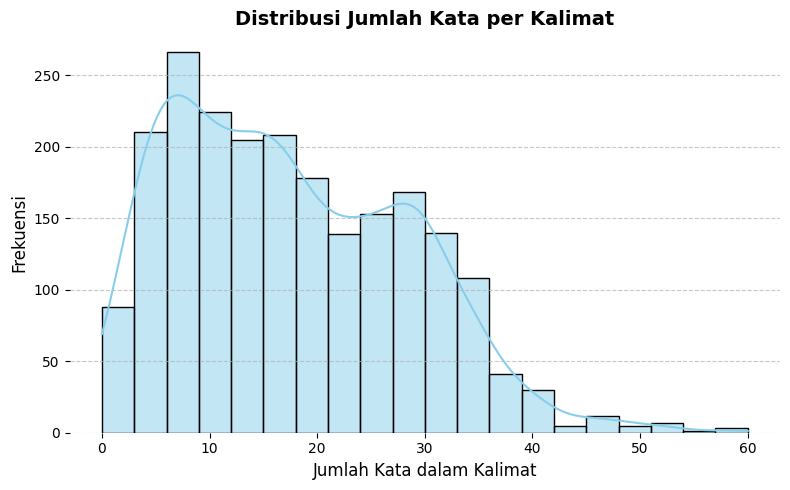

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

print(df[['clean_text', 'word_count']].head())

plt.figure(figsize=(8, 5))
sns.histplot(df['word_count'], bins=20, kde=True, color='skyblue')

plt.title('Distribusi Jumlah Kata per Kalimat', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Kata dalam Kalimat', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer_bigram = CountVectorizer(
    stop_words=all_stopwords,
    ngram_range=(2, 2),
    max_features=30
)

bow_bigram = vectorizer_bigram.fit_transform(df['clean_text'])

bigram_freq = pd.DataFrame({
    'bigram': vectorizer_bigram.get_feature_names_out(),
    'count': bow_bigram.toarray().sum(axis=0)
}).sort_values(by='count', ascending=False)

print(bigram_freq.head(10))


                   bigram  count
10         kepala sekolah     59
19              orang tua     54
12     lingkungan sekolah     47
13  meningkatkan kualitas     43
15        merokok sekolah     42
16       ngerokok sekolah     30
25          siswa merokok     30
2            anak sekolah     28
5         dihormati dunia     27
11        kualitas sambut     24


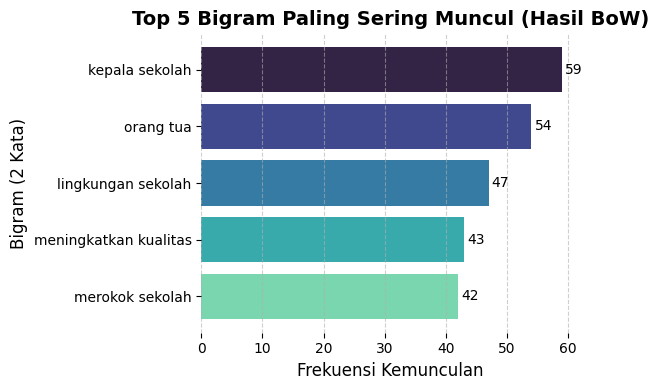

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
bars = plt.barh(bigram_freq['bigram'][:5], bigram_freq['count'][:5], color=sns.color_palette("mako", 5))
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', fontsize=10)

plt.title('Top 5 Bigram Paling Sering Muncul (Hasil BoW)', fontsize=14, fontweight='bold')
plt.xlabel('Frekuensi Kemunculan', fontsize=12)
plt.ylabel('Bigram (2 Kata)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [36]:
from transformers import pipeline
import pandas as pd

sentiment_model = pipeline(
    "sentiment-analysis",
    model="w11wo/indonesian-roberta-base-sentiment-classifier"
)

df = df[df['clean_text'].notnull() & (df['clean_text'].str.strip() != "")].copy()
df['clean_text'] = df['clean_text'].astype(str)
df = df.reset_index(drop=True)

preds_all = []
batch_size = 500

for i in range(0, len(df), batch_size):
    batch = list(df['clean_text'][i:i+batch_size])
    if len(batch) == 0:
        continue
    preds = sentiment_model(batch)
    preds_all.extend(preds)

df['pred_label'] = [p['label'].lower() for p in preds_all]
df['pred_score'] = [p['score'] for p in preds_all]

df[['clean_text', 'pred_label', 'pred_score']].head()


Device set to use cpu


,clean_text,pred_label,pred_score
0,emang awal mula ajaran jongkok depan kyai ngas...,negative,0.998162
1,gub dan wagub nya jadi agen perusak anak didik...,negative,0.998359
2,gubernur banten andra soni menanggapi kasus ke...,neutral,0.998968
3,seorang siswa kelas vii smp negeri 1 geyer di ...,neutral,0.996903
4,jaman gw waktu itu jikalau gw ketahuan dimarah...,negative,0.998114


In [37]:
label_map = {
    'positif': 'positive',
    'netral': 'neutral',
    'negatif': 'negative'
}

df['label'] = df['label'].replace(label_map)


              precision    recall  f1-score   support

    negative       0.68      0.87      0.76       163
     neutral       0.41      0.47      0.44       111
    positive       0.74      0.38      0.50       121

    accuracy                           0.61       395
   macro avg       0.61      0.57      0.57       395
weighted avg       0.62      0.61      0.59       395



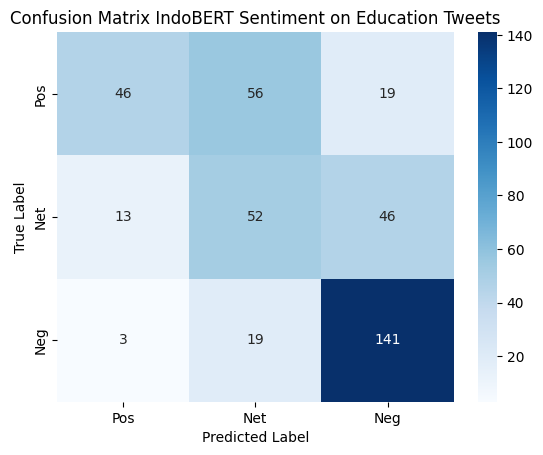

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df_eval = df[df['label'].notnull()]

print(classification_report(df_eval['label'], df_eval['pred_label']))

cm = confusion_matrix(df_eval['label'], df_eval['pred_label'], labels=['positive','neutral','negative'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pos','Net','Neg'],
            yticklabels=['Pos','Net','Neg'])
plt.title("Confusion Matrix IndoBERT Sentiment on Education Tweets")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [39]:
sentimen_count = df.groupby(['daerah', 'pred_label']).size().unstack(fill_value=0)
sentimen_count['total'] = sentimen_count.sum(axis=1)
sentimen_count['positive_rate'] = sentimen_count['positive'] / sentimen_count['total']
sentimen_count['negative_rate'] = sentimen_count['negative'] / sentimen_count['total']
sentimen_count['neutral_rate'] = sentimen_count['neutral'] / sentimen_count['total']

print("Top 5 Sentimen Positif:")
print(sentimen_count.sort_values('positive_rate', ascending=False).head(5)[['positive_rate']])

print("\nTop 5 Sentimen Negatif:")
print(sentimen_count.sort_values('negative_rate', ascending=False).head(5)[['negative_rate']])

print("\nTop 5 Sentimen Netral:")
print(sentimen_count.sort_values('neutral_rate', ascending=False).head(5)[['neutral_rate']])


Top 5 Sentimen Positif:
pred_label            positive_rate
daerah                             
Kabupaten_Sumenep          0.338983
Kota_Madiun                0.275862
Kabupaten_Trenggalek       0.258621
Kota_Blitar                0.258621
Kabupaten_Mojokerto        0.250000

Top 5 Sentimen Negatif:
pred_label            negative_rate
daerah                             
Kabupaten_Pacitan          0.615385
Kabupaten_Jember           0.583333
Kabupaten_Blitar           0.583333
Kabupaten_Banyuwangi       0.566667
Kabupaten_Lamongan         0.566667

Top 5 Sentimen Netral:
pred_label             neutral_rate
daerah                             
Kabupaten_Bojonegoro       0.416667
Kabupaten_Malang           0.406780
Kabupaten_Tulungagung      0.383333
Kabupaten_Lumajang         0.375000
Kabupaten_Gresik           0.366667


In [40]:
sentimen_count = df.groupby(['daerah', 'pred_label']).size().unstack(fill_value=0)
sentimen_count['total'] = sentimen_count.sum(axis=1)
sentimen_count['positive_rate'] = sentimen_count['positive'] / sentimen_count['total']
sentimen_count['negative_rate'] = sentimen_count['negative'] / sentimen_count['total']
sentimen_count['neutral_rate'] = sentimen_count['neutral'] / sentimen_count['total']

print("Top 3 Sentimen Positif:")
print(sentimen_count.sort_values('positive_rate', ascending=False).head(3)[['positive_rate']])

print("\nTop 3 Sentimen Negatif:")
print(sentimen_count.sort_values('negative_rate', ascending=False).head(3)[['negative_rate']])

print("\nTop 3 Sentimen Netral:")
print(sentimen_count.sort_values('neutral_rate', ascending=False).head(3)[['neutral_rate']])


Top 3 Sentimen Positif:
pred_label            positive_rate
daerah                             
Kabupaten_Sumenep          0.338983
Kota_Madiun                0.275862
Kabupaten_Trenggalek       0.258621

Top 3 Sentimen Negatif:
pred_label         negative_rate
daerah                          
Kabupaten_Pacitan       0.615385
Kabupaten_Jember        0.583333
Kabupaten_Blitar        0.583333

Top 3 Sentimen Netral:
pred_label             neutral_rate
daerah                             
Kabupaten_Bojonegoro       0.416667
Kabupaten_Malang           0.406780
Kabupaten_Tulungagung      0.383333


/tmp/ipython-input-3698462887.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='positive_rate', y=top_positive.index, data=top_positive, palette='Greens')
/tmp/ipython-input-3698462887.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='negative_rate', y=top_negative.index, data=top_negative, palette='Reds')
/tmp/ipython-input-3698462887.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neutral_rate', y=top_neutral.index, data=top_neutral, palette='Blues')


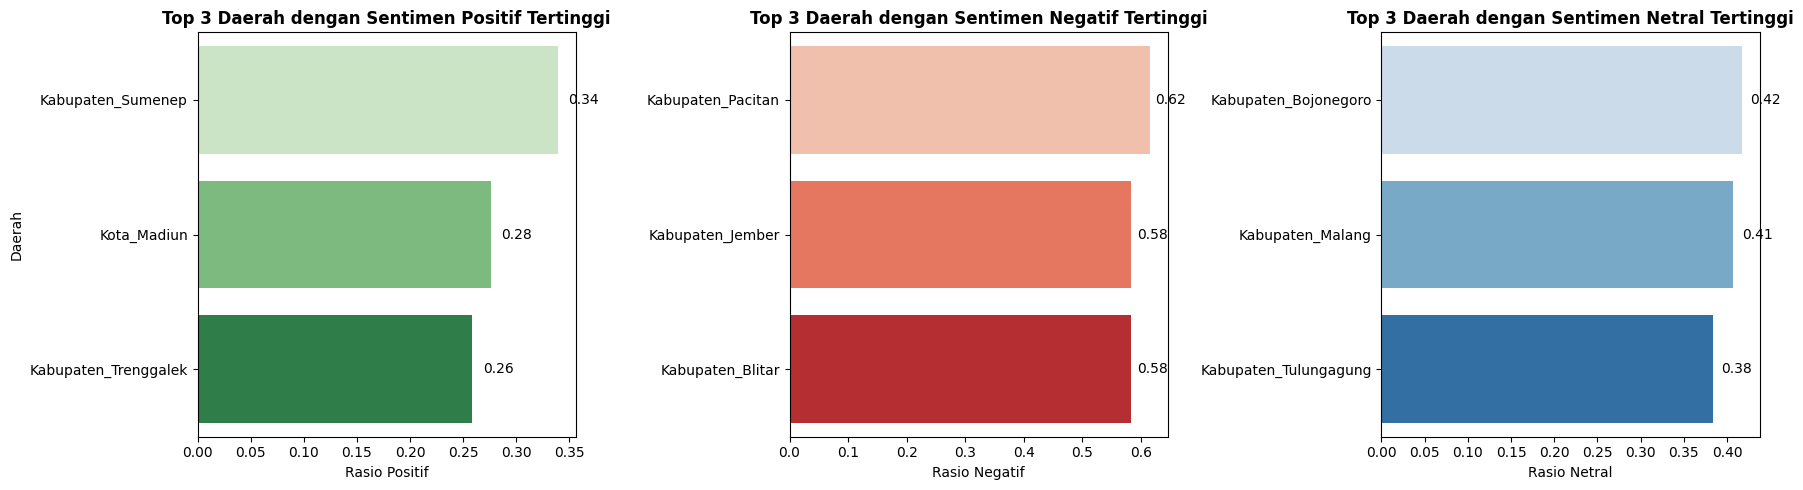

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

top_positive = sentimen_count.sort_values('positive_rate', ascending=False).head(3)
top_negative = sentimen_count.sort_values('negative_rate', ascending=False).head(3)
top_neutral = sentimen_count.sort_values('neutral_rate', ascending=False).head(3)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(x='positive_rate', y=top_positive.index, data=top_positive, palette='Greens')
plt.title("Top 3 Daerah dengan Sentimen Positif Tertinggi", fontsize=12, fontweight='bold')
plt.xlabel("Rasio Positif")
plt.ylabel("Daerah")
for i, v in enumerate(top_positive['positive_rate']):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center')

plt.subplot(1,3,2)
sns.barplot(x='negative_rate', y=top_negative.index, data=top_negative, palette='Reds')
plt.title("Top 3 Daerah dengan Sentimen Negatif Tertinggi", fontsize=12, fontweight='bold')
plt.xlabel("Rasio Negatif")
plt.ylabel("")
for i, v in enumerate(top_negative['negative_rate']):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center')

plt.subplot(1,3,3)
sns.barplot(x='neutral_rate', y=top_neutral.index, data=top_neutral, palette='Blues')
plt.title("Top 3 Daerah dengan Sentimen Netral Tertinggi", fontsize=12, fontweight='bold')
plt.xlabel("Rasio Netral")
plt.ylabel("")
for i, v in enumerate(top_neutral['neutral_rate']):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.show()


In [42]:
negative_sorted = sentimen_count.sort_values('negative_rate', ascending=False)

print("Daftar Kabupaten/Kota dari Negative Rate Tertinggi ke Terendah:")
print(negative_sorted[['negative_rate', 'positive_rate', 'neutral_rate']])


Daftar Kabupaten/Kota dari Negative Rate Tertinggi ke Terendah:
pred_label             negative_rate  positive_rate  neutral_rate
daerah                                                           
Kabupaten_Pacitan           0.615385       0.179487      0.205128
Kabupaten_Jember            0.583333       0.100000      0.316667
Kabupaten_Blitar            0.583333       0.083333      0.333333
Kabupaten_Banyuwangi        0.566667       0.116667      0.316667
Kabupaten_Lamongan          0.566667       0.083333      0.350000
Kabupaten_Sampang           0.566667       0.200000      0.233333
Kabupaten_Probolinggo       0.559322       0.152542      0.288136
Kabupaten_Bondowoso         0.559322       0.101695      0.338983
Kabupaten_Tuban             0.550000       0.166667      0.283333
Kota_Probolinggo            0.550000       0.116667      0.333333
Kota_Batu                   0.550000       0.233333      0.216667
Kabupaten_Situbondo         0.550000       0.200000      0.250000
Kota_Surabay

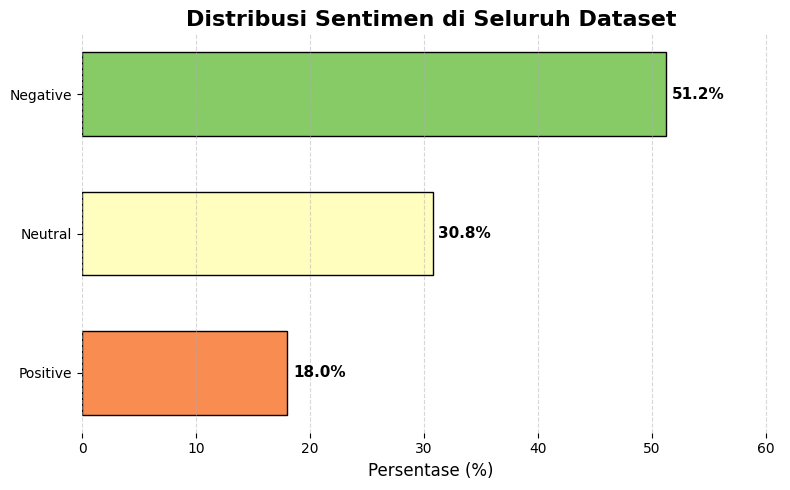

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sentiment_counts = df['pred_label'].value_counts()
sentiment_percent = sentiment_counts / sentiment_counts.sum() * 100
sentiment_percent = sentiment_percent.reindex(['positive', 'neutral', 'negative'])

colors = sns.color_palette("RdYlGn_r", n_colors=3)[::-1]

plt.figure(figsize=(8,5))
bars = plt.barh(sentiment_percent.index.str.capitalize(), sentiment_percent.values, color=colors, edgecolor='black', height=0.6)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f"{width:.1f}%", va='center', fontsize=11, fontweight='bold')

plt.xlabel("Persentase (%)", fontsize=12)
plt.title("Distribusi Sentimen di Seluruh Dataset", fontsize=16, fontweight='bold')
plt.xlim(0, max(sentiment_percent.values) + 10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()
